# Data Analyst Associate Case Study

## Company Background

Vivendo is a fast food chain with 200+ stores in four locations in Brazil. For the past five years, this fast food chain has experienced incredible growth. To reorganize its legal department, they have hired a new chief legal officer.  

## Customer Question

The chief legal officer has decided to investigate the existing claims records. They want to come up with a plan for the future. They would like you to answer the following questions to help:

- What are the characteristics of the claims in different locations? 
- How much does the claim amount differ from each claim?
- What we can learn from comparing active claims and closed claims?

## Dataset
The data you will use for this analysis can be downloaded from [here](https://s3.amazonaws.com/talent-assets.datacamp.com/restuarant_claims.csv).

## Data Analyst Associate Case Study Submission

Use this template to write up your summary for submission. You can use any markdown formatting you wish. 

To include visualizations, upload a png or jpeg file using the menu on the left. Then use the template code below (click on the edit option to the right of this box to see the code) to add the graphic in the position you want it to appear.

![Alternative Text](name_of_file.png)
![Jpeg Example](name_of_file.jpeg)


### Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

After reading the CSV file, the first thing I do is to see the data type of each column with the DTYPES attribute. It shows that every column is an object, so I need to make some data conversions to match the criteria of the data dictionary.
I use the TO_DATETIME function to convert both CLAIM START DATE and CLOSE DATE columns from object to datetime. I specify the DAYFIRST argument to reach the right format.

After that, I make some transformations on the money columns, which are CLAIM AMOUNT and AMOUNT PAID. The objective is to convert both columns to numeric type, so I must stay only with the "clean" number and then I can convert it with the TO_NUMERIC function.

Then I check again that the data types are right.

Last, but not least, I add a new column named CLAIM_STATUS, which indicates CLOSED if the claim has been paid and closed, or OPEN if the claim has not been closed yet.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Read the CSV file
df= pd.read_csv('restuarant_claims.csv')
df.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,0000000-00.2010.0.00.0094,TAX,7/5/2010,17/3/2016,"R$50,000.00","R$15,000.00",RECIFE,-,NaN,NaN
1,0000000-00.2011.0.00.0086,TAX,3/3/2011,NaN,"R$180,000.00",NaN,SÃO LUÍS,-,NaN,NaN
2,0000000-00.2012.0.00.0092,TAX,17/10/2012,NaN,"R$70,000.00",NaN,SÃO LUÍS,-,NaN,NaN
3,0000000-00.2013.0.00.0096,TAX,17/12/2013,2/2/2017,"R$95,104.00","R$72,279.00",FORTALEZA,-,NaN,NaN
4,0000000-00.2014.0.00.0097,TAX,15/1/2014,5/12/2014,"R$29,000.00","R$5,800.00",FORTALEZA,-,NaN,NaN


In [4]:
#Explore the data types
df.dtypes

LAWSUIT NUMBER       object
AREA                 object
CLAIM START DATE     object
CLOSE DATE           object
CLAIM AMOUNT         object
AMOUNT PAID          object
CITY SUBSIDIARIES    object
CONTRACT TYPE        object
SUPPLIER NAME        object
TYPE OF POSITION     object
dtype: object

In [5]:
#Convert some columns from object to datetime
df['CLAIM START DATE']= pd.to_datetime(df['CLAIM START DATE'], dayfirst=True)
df['CLOSE DATE']= pd.to_datetime(df['CLOSE DATE'], dayfirst=True)

In [6]:
df.dtypes

LAWSUIT NUMBER               object
AREA                         object
CLAIM START DATE     datetime64[ns]
CLOSE DATE           datetime64[ns]
CLAIM AMOUNT                 object
AMOUNT PAID                  object
CITY SUBSIDIARIES            object
CONTRACT TYPE                object
SUPPLIER NAME                object
TYPE OF POSITION             object
dtype: object

In [7]:
df.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,0000000-00.2010.0.00.0094,TAX,2010-05-07,2016-03-17,"R$50,000.00","R$15,000.00",RECIFE,-,NaN,NaN
1,0000000-00.2011.0.00.0086,TAX,2011-03-03,NaT,"R$180,000.00",NaN,SÃO LUÍS,-,NaN,NaN
2,0000000-00.2012.0.00.0092,TAX,2012-10-17,NaT,"R$70,000.00",NaN,SÃO LUÍS,-,NaN,NaN
3,0000000-00.2013.0.00.0096,TAX,2013-12-17,2017-02-02,"R$95,104.00","R$72,279.00",FORTALEZA,-,NaN,NaN
4,0000000-00.2014.0.00.0097,TAX,2014-01-15,2014-12-05,"R$29,000.00","R$5,800.00",FORTALEZA,-,NaN,NaN


In [8]:
#Convert some columns from object to numeric
df['CLAIM AMOUNT']= pd.to_numeric(df['CLAIM AMOUNT'].str.lstrip('R$').str.replace(',',''))
df['AMOUNT PAID']= pd.to_numeric(df['AMOUNT PAID'].str.lstrip('R$').str.replace(',',''))

In [9]:
df.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,0000000-00.2010.0.00.0094,TAX,2010-05-07,2016-03-17,50000.0,15000.0,RECIFE,-,NaN,NaN
1,0000000-00.2011.0.00.0086,TAX,2011-03-03,NaT,180000.0,NaN,SÃO LUÍS,-,NaN,NaN
2,0000000-00.2012.0.00.0092,TAX,2012-10-17,NaT,70000.0,NaN,SÃO LUÍS,-,NaN,NaN
3,0000000-00.2013.0.00.0096,TAX,2013-12-17,2017-02-02,95104.0,72279.0,FORTALEZA,-,NaN,NaN
4,0000000-00.2014.0.00.0097,TAX,2014-01-15,2014-12-05,29000.0,5800.0,FORTALEZA,-,NaN,NaN


In [10]:
#Check the new data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   LAWSUIT NUMBER     98 non-null     object        
 1   AREA               98 non-null     object        
 2   CLAIM START DATE   98 non-null     datetime64[ns]
 3   CLOSE DATE         14 non-null     datetime64[ns]
 4   CLAIM AMOUNT       98 non-null     float64       
 5   AMOUNT PAID        14 non-null     float64       
 6   CITY SUBSIDIARIES  98 non-null     object        
 7   CONTRACT TYPE      98 non-null     object        
 8   SUPPLIER NAME      82 non-null     object        
 9   TYPE OF POSITION   82 non-null     object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 7.8+ KB


In [11]:
#Add a new column
df['CLAIM_STATUS']= ["Open" if s == True else "Closed" for s in df['CLOSE DATE'].isnull()]

In [12]:
df.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION,CLAIM_STATUS
0,0000000-00.2010.0.00.0094,TAX,2010-05-07,2016-03-17,50000.0,15000.0,RECIFE,-,NaN,NaN,Closed
1,0000000-00.2011.0.00.0086,TAX,2011-03-03,NaT,180000.0,NaN,SÃO LUÍS,-,NaN,NaN,Open
2,0000000-00.2012.0.00.0092,TAX,2012-10-17,NaT,70000.0,NaN,SÃO LUÍS,-,NaN,NaN,Open
3,0000000-00.2013.0.00.0096,TAX,2013-12-17,2017-02-02,95104.0,72279.0,FORTALEZA,-,NaN,NaN,Closed
4,0000000-00.2014.0.00.0097,TAX,2014-01-15,2014-12-05,29000.0,5800.0,FORTALEZA,-,NaN,NaN,Closed


### Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

Firstly, I want to show the evolution over time of both the number of claims and the amount claimed. What the data shows is that 2019 was the year with the largest number of claims (29 claims) and was the year with the highest amount claimed (3,162,139). Both variables show a growing trend over the years. Regarding the closed claims, 2020 was the year with the largest number of closed claims (4), but 2018 was the year with the highest amount paid, since the only closed claim in 2018 was also the most expensive one.

About the characteristics of the claims in different locations, the data shows that Sao Luis is the city with the largest number of claims (30). Most of them are from the labor area and are still open. The mean of claims per city is 24.5 and the standard deviation is 4. In every city, there are always more open claims rather than closed ones, and there are also more labor claims, rather than tax ones. 
The data also shows that Natal is the city with the highest mean of claimed amount (192,628), but with a high dispersion. The overall mean is 122,952. When comparing the mean of claim amounts per city, area and status, the data shows that there is a non-typical value for closed cases in Natal. Effectively, I discover that there is a closed case from Natal whose claim amount is extremely high: 936,540. That’s why I decided to explore the median, which turns out to be much more homogeneous and it’s Recife which has the largest one.
Fortaleza is the city the largest number of closed claims (5 claims). Three of them are from the tax area and two from the labor area. On the other hand, Sao Luis is the city with the smallest number of closed cases (2). Natal is the city with the highest mean of paid amount ($128,618) but with a huge dispersion. There is an extreme value which is affecting the mean. If we observe the median instead, there is a more reasonable value: $19,351. In the same way, the overall mean is $63,746 whereas the overall median is $22,000. That is a quite skewed distribution.

The distribution of the claim amount variable is very skewed to the right. The mean is 122,952 whereas the median is 58,454. The standard deviation, on the other hand, is 166,433, which shows a large dispersion. At the same time, the boxplot shows many outliers. The histogram shows that most of the claims are between 0 and 100,000. 

Comparing open and closed claims, there many more open claims that closed ones (84 vs. 14). Most claims which are still open are from the labor area (74). The mean of claimed amount for closed claims is 132,097 whereas for open claims is 121,292. 

Considering that most of the claims are from the labor area, I decided to explore that group in more detail. It turns out that there are many more claims from suppliers (58) rather than claims from own employees (24). Furthermore, all the closed claims are from suppliers (8).
The supplier with largest number of claims is Blue’s Cleaning, with 28. Then it’s Eagle Surveillance with 21 and Oregon with 9. The only supplier with closed claims is Oregon. The position with most claims is Cleaning Assistant, with 24. On the other hand, the labor claims from own employees are mostly from kitchen assistants (13 claims).

Finally, I want to analyze if there is a relationship between the claimed amount and the paid amount. At first, I plot a regression model, but it turns out that there is an extreme value which affects the performance of the model. That’s why I decided to delete the extreme value and proceed without it. Now the model fits much better and it shows a positive linear relationship.






## Evolution over time

### Evolution of new claims

In [13]:
new_cases= df.groupby(df['CLAIM START DATE'].dt.year)['LAWSUIT NUMBER'].count()

In [14]:
new_cases

CLAIM START DATE
2010     1
2011     1
2012     1
2013     1
2014     5
2015     4
2016    10
2017     9
2018    17
2019    29
2020    20
Name: LAWSUIT NUMBER, dtype: int64

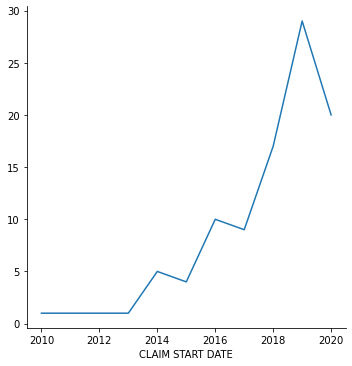

In [15]:
#Number of new claims per year
sns.relplot(x= new_cases.index, y= new_cases.values, kind='line')
plt.show()

### Evolution of claimed amount

In [16]:

claim_amount= df.groupby(df['CLAIM START DATE'].dt.year)['CLAIM AMOUNT'].sum()

In [17]:
claim_amount

CLAIM START DATE
2010      50000.0
2011     180000.0
2012      70000.0
2013      95104.0
2014     339870.0
2015     152542.0
2016     774763.0
2017    1711742.0
2018    2640769.0
2019    3162139.0
2020    2872370.0
Name: CLAIM AMOUNT, dtype: float64

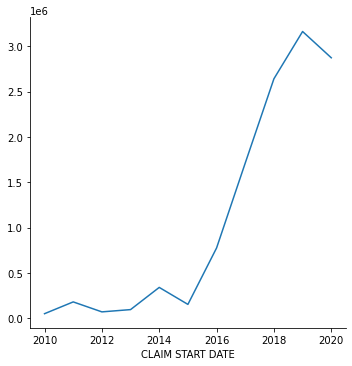

In [18]:
#Amount claimed per year
sns.relplot(x= claim_amount.index, y= claim_amount.values, kind='line')
plt.show()

### Evolution of closed claims

In [19]:

closed_cases= df.groupby(df['CLOSE DATE'].dt.year)['LAWSUIT NUMBER'].count()

In [20]:
closed_cases

CLOSE DATE
2014.0    1
2015.0    2
2016.0    2
2017.0    2
2018.0    1
2019.0    2
2020.0    4
Name: LAWSUIT NUMBER, dtype: int64

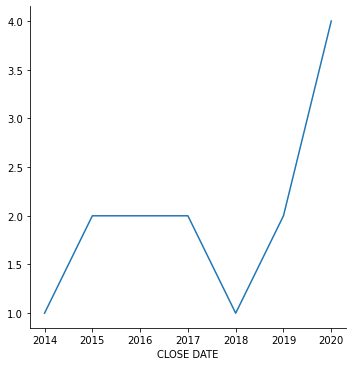

In [21]:
#Closed claims per year
sns.relplot(x= closed_cases.index, y= closed_cases.values, kind='line')
plt.show()

### Evolution of amount paid

In [22]:
amount_paid= df.groupby(df['CLOSE DATE'].dt.year)['AMOUNT PAID'].sum()

In [23]:
amount_paid

CLOSE DATE
2014.0      5800.0
2015.0    120000.0
2016.0     40000.0
2017.0     96279.0
2018.0    468270.0
2019.0     21700.0
2020.0    140408.0
Name: AMOUNT PAID, dtype: float64

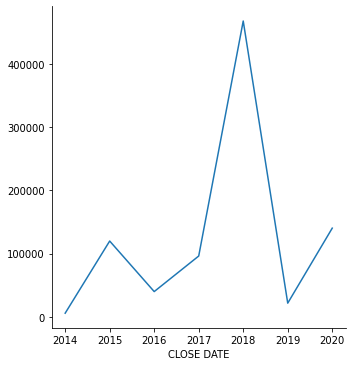

In [24]:
#Amount paid per year
sns.relplot(x= amount_paid.index, y= amount_paid.values, kind='line')
plt.show()

## Characteristics of the claims in different locations

### Number of claims per city

In [25]:
#Descriptive stats about the distribution of the claims per city
df['CITY SUBSIDIARIES'].value_counts().describe()

count     4.000000
mean     24.500000
std       4.041452
min      21.000000
25%      21.750000
50%      23.500000
75%      26.250000
max      30.000000
Name: CITY SUBSIDIARIES, dtype: float64

In [26]:
df['CITY SUBSIDIARIES'].value_counts()

SÃO LUÍS     30
RECIFE       25
FORTALEZA    22
NATAL        21
Name: CITY SUBSIDIARIES, dtype: int64

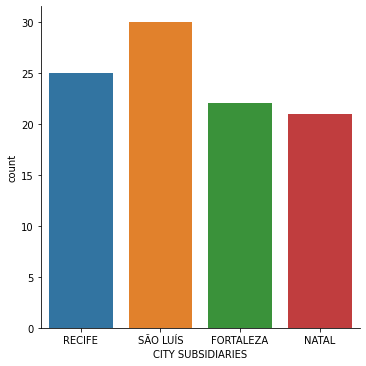

In [27]:
#Number of claims per city
sns.catplot(x='CITY SUBSIDIARIES', data=df, kind= 'count')
plt.show()

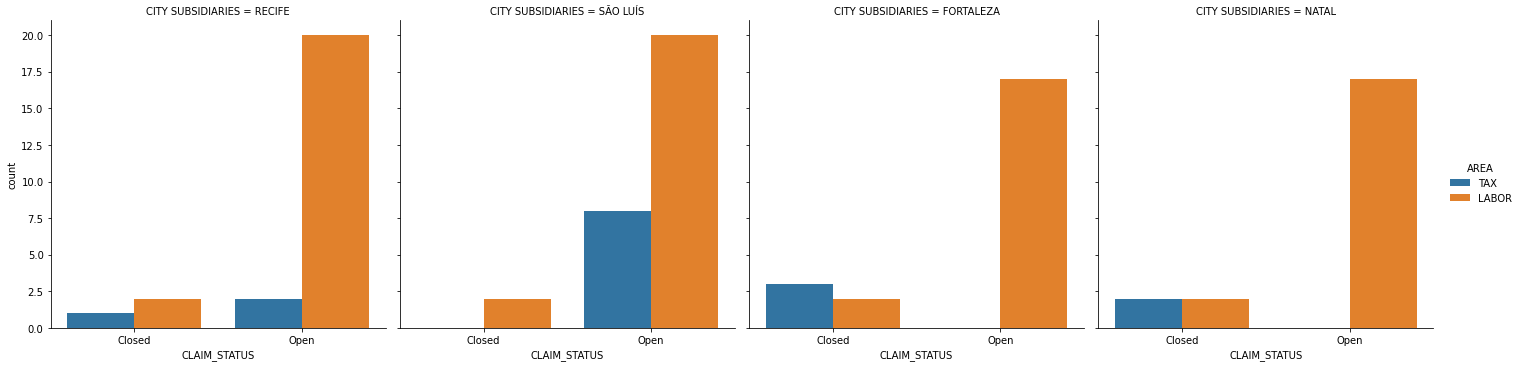

In [28]:
#Number of claims per city, area and status
sns.catplot(col='CITY SUBSIDIARIES', hue= 'AREA', data=df, kind= 'count', x= 'CLAIM_STATUS')
plt.show()

In [29]:
#Number of claims per city, area and status
pd.pivot_table(index=['AREA', 'CLAIM_STATUS'], columns='CITY SUBSIDIARIES', aggfunc= 'count', data= df, values= 'LAWSUIT NUMBER', margins= True)

CITY SUBSIDIARIES   FORTALEZA  NATAL  RECIFE  SÃO LUÍS  All
AREA  CLAIM_STATUS                                         
LABOR Closed              2.0    2.0     2.0       2.0    8
      Open               17.0   17.0    20.0      20.0   74
TAX   Closed              3.0    2.0     1.0       NaN    6
      Open                NaN    NaN     2.0       8.0   10
All                      22.0   21.0    25.0      30.0   98

### Claimed amount per city

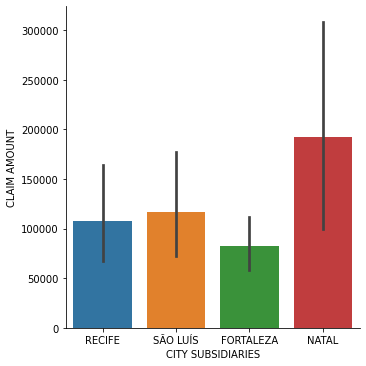

In [30]:
#Mean of claimed amount per city
sns.catplot(x= 'CITY SUBSIDIARIES', y = 'CLAIM AMOUNT', data= df, kind= 'bar')
plt.show()

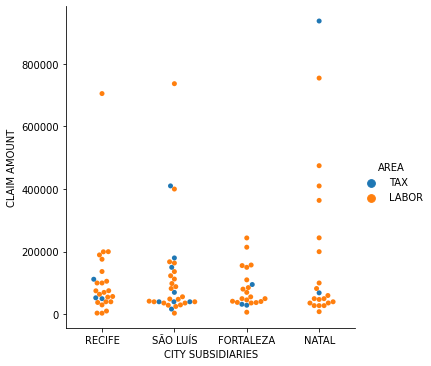

In [31]:
#Distribution of claim amount along cities
sns.catplot(x= 'CITY SUBSIDIARIES', y= 'CLAIM AMOUNT', kind="swarm", data= df, hue='AREA')
plt.show()

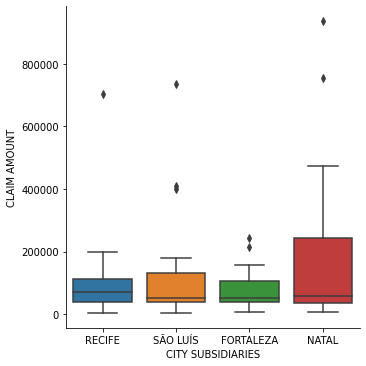

In [32]:
#Distribution of claimed amount along cities
sns.catplot(x= 'CITY SUBSIDIARIES', y= 'CLAIM AMOUNT', kind= "box", data= df)
plt.show()

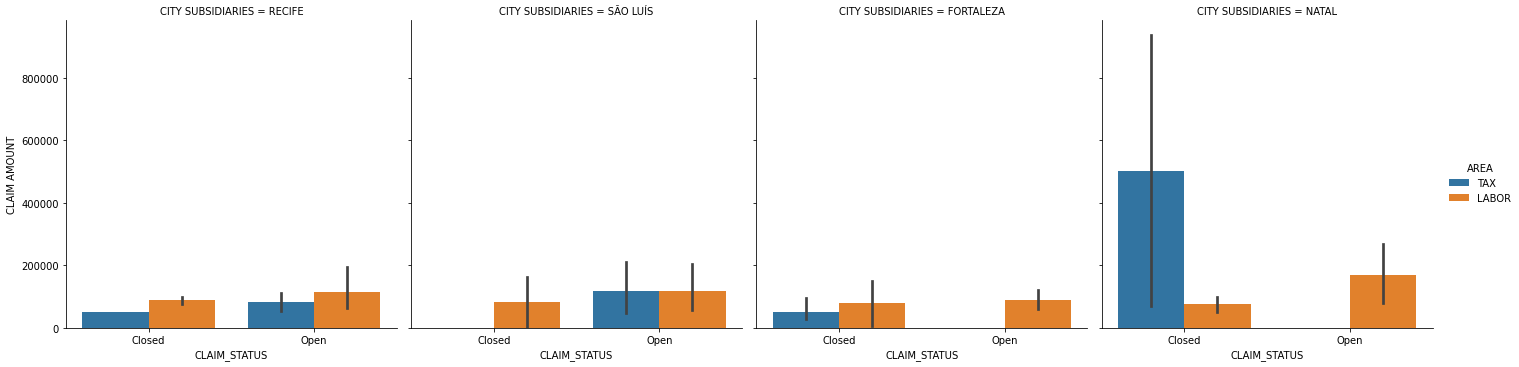

In [33]:
#Mean of claimed amount per city, area and status
sns.catplot(col= 'CITY SUBSIDIARIES', y = 'CLAIM AMOUNT', hue= 'AREA', data= df, x='CLAIM_STATUS', kind= 'bar')
plt.show()

In [75]:
extreme= df[(df['CITY SUBSIDIARIES'] == 'NATAL') & (df['CLAIM_STATUS'] == 'Closed')]
extreme[extreme['CLAIM AMOUNT'] == extreme['CLAIM AMOUNT'].max()]

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION,CLAIM_STATUS
40,0000000-00.2018.0.00.0098,TAX,2018-07-20,2018-12-20,936540.0,468270.0,NATAL,-,NaN,NaN,Closed


In [76]:
#Median of claimed amount per city
df.groupby('CITY SUBSIDIARIES')['CLAIM AMOUNT'].median()

CITY SUBSIDIARIES
FORTALEZA    52844.5
NATAL        60000.0
RECIFE       70000.0
SÃO LUÍS     52436.0
Name: CLAIM AMOUNT, dtype: float64

In [34]:
#Mean of claimed amount per city, area and status
pd.pivot_table(index=['AREA', 'CLAIM_STATUS'], columns='CITY SUBSIDIARIES', aggfunc= np.mean, data= df, values= 'CLAIM AMOUNT', margins= True)

CITY SUBSIDIARIES      FORTALEZA          NATAL     RECIFE       SÃO LUÍS  \
AREA  CLAIM_STATUS                                                          
LABOR Closed        78345.500000   75000.000000   87676.50   83751.000000   
      Open          88983.000000  170008.352941  114918.60  118796.750000   
TAX   Closed        52034.666667  502525.500000   50000.00            NaN   
      Open                   NaN            NaN   82324.50  118348.625000   
All                 82977.545455  192628.238095  107534.96  116340.866667   

CITY SUBSIDIARIES             All  
AREA  CLAIM_STATUS                 
LABOR Closed         81193.250000  
      Open          122664.324324  
TAX   Closed        201859.166667  
      Open          111143.800000  
All                 122952.030612

### Closed claims per city

In [35]:
closed = df[df['CLAIM_STATUS'] == 'Closed']
closed.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION,CLAIM_STATUS
0,0000000-00.2010.0.00.0094,TAX,2010-05-07,2016-03-17,50000.0,15000.0,RECIFE,-,NaN,NaN,Closed
3,0000000-00.2013.0.00.0096,TAX,2013-12-17,2017-02-02,95104.0,72279.0,FORTALEZA,-,NaN,NaN,Closed
4,0000000-00.2014.0.00.0097,TAX,2014-01-15,2014-12-05,29000.0,5800.0,FORTALEZA,-,NaN,NaN,Closed
5,0000000-00.2014.0.00.0077,LABOR,2014-02-02,2015-03-09,150000.0,112500.0,FORTALEZA,THIRD,OREGON,TELEMARKETING ATTENDANT,Closed
6,0000000-00.2014.0.00.0076,LABOR,2014-07-22,2015-04-08,50000.0,7500.0,NATAL,THIRD,OREGON,TELEMARKETING ATTENDANT,Closed


In [36]:
#Number of closed claims per city
closed['CITY SUBSIDIARIES'].value_counts()

FORTALEZA    5
NATAL        4
RECIFE       3
SÃO LUÍS     2
Name: CITY SUBSIDIARIES, dtype: int64

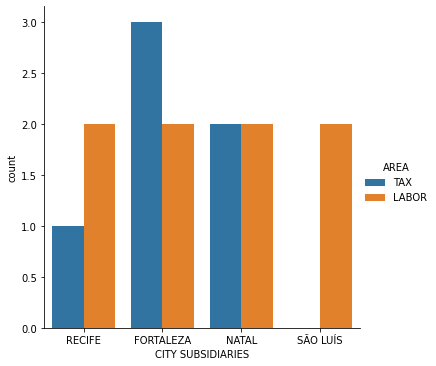

In [37]:
#Number of closed claims per city and area
sns.catplot(x='CITY SUBSIDIARIES', data= closed, kind= 'count', hue= 'AREA')
plt.show()

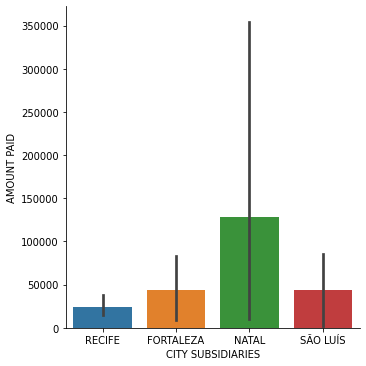

In [38]:
#Mean of amount paid by city, only closed claims
sns.catplot(x= 'CITY SUBSIDIARIES', y = 'AMOUNT PAID', data= closed, kind= 'bar')
plt.show()

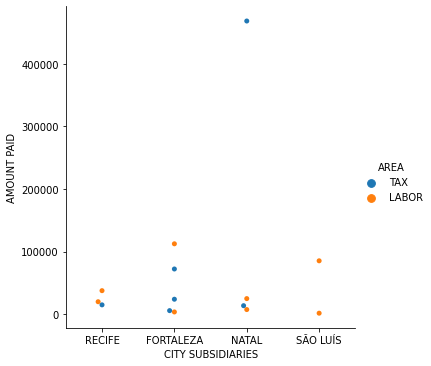

In [39]:

sns.catplot(x= 'CITY SUBSIDIARIES', y = 'AMOUNT PAID', data= closed, kind= 'swarm', hue='AREA')
plt.show()

In [40]:
#Mean of paid amount per city and area
pd.pivot_table(index='AREA', columns='CITY SUBSIDIARIES', aggfunc= np.median, data= closed, values= 'AMOUNT PAID', margins= True)

CITY SUBSIDIARIES,FORTALEZA,NATAL,RECIFE,SÃO LUÍS,All
AREA,,,,,
LABOR,58090.0,16250.0,28838.0,43525.0,22500.0
TAX,24000.0,240986.0,15000.0,NaN,19500.0
All,24000.0,19351.0,20000.0,43525.0,22000.0


## How much does the claim amount differ from each claim?

In [41]:
#Descriptive stats of claim amount variable
df['CLAIM AMOUNT'].describe()

count        98.000000
mean     122952.030612
std      166433.389040
min        3555.000000
25%       40000.000000
50%       58454.500000
75%      136573.250000
max      936540.000000
Name: CLAIM AMOUNT, dtype: float64

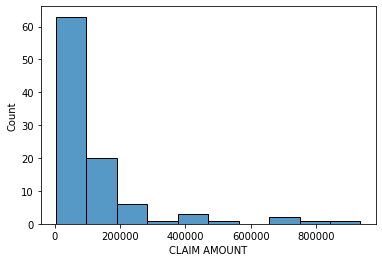

In [42]:
#Histogram of claim amount distribution
sns.histplot(data= df, x="CLAIM AMOUNT", bins= 10)
plt.show()

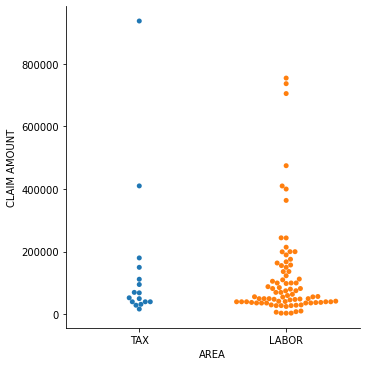

In [43]:
#Distribution of claim amount
sns.catplot(y="CLAIM AMOUNT", kind="swarm", data= df, x='AREA')
plt.show()

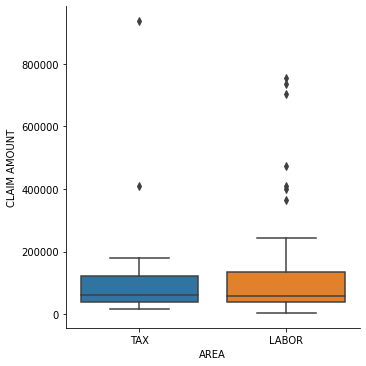

In [44]:
#Distribution of claim amount
sns.catplot(y="CLAIM AMOUNT", kind="box", data= df, x='AREA')
plt.show()

## What we can learn from comparing active claims and closed claims?

In [45]:
df['CLAIM_STATUS'].value_counts()

Open      84
Closed    14
Name: CLAIM_STATUS, dtype: int64

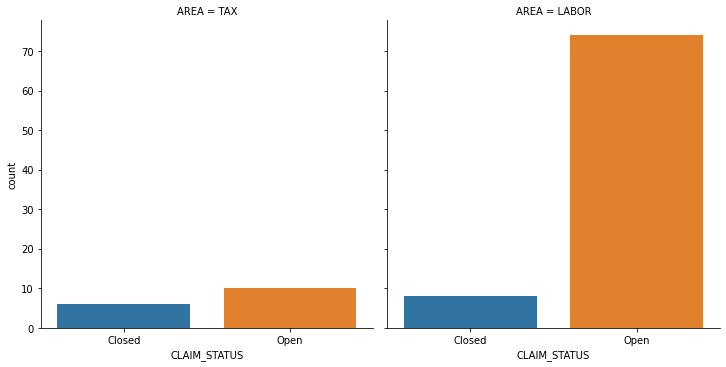

In [46]:
#Claims per status and area
sns.catplot(x='CLAIM_STATUS', data= df, kind= 'count', col='AREA')
plt.show()

In [47]:
#Number of claims by area and claim status
pd.pivot_table(index='AREA', columns='CLAIM_STATUS', aggfunc= 'count', data= df, values= 'LAWSUIT NUMBER', margins= True)

CLAIM_STATUS,Closed,Open,All
AREA,,,
LABOR,8,74,82
TAX,6,10,16
All,14,84,98


In [48]:
#Mean of claim amount for both closed and open claims
df.groupby('CLAIM_STATUS')['CLAIM AMOUNT'].mean()

CLAIM_STATUS
Closed    132907.214286
Open      121292.833333
Name: CLAIM AMOUNT, dtype: float64

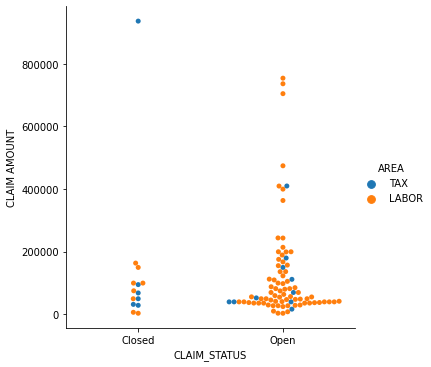

In [49]:
#Distribution of claim amount for closed and open claims
sns.catplot(x="CLAIM_STATUS", y="CLAIM AMOUNT", hue="AREA", kind="swarm", data= df)
plt.show()

### Labor claims

In [50]:
LaborClaims= df[df['AREA'] == 'LABOR']
LaborClaims.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION,CLAIM_STATUS
5,0000000-00.2014.0.00.0077,LABOR,2014-02-02,2015-03-09,150000.0,112500.0,FORTALEZA,THIRD,OREGON,TELEMARKETING ATTENDANT,Closed
6,0000000-00.2014.0.00.0076,LABOR,2014-07-22,2015-04-08,50000.0,7500.0,NATAL,THIRD,OREGON,TELEMARKETING ATTENDANT,Closed
7,0000000-00.2014.0.00.0043,LABOR,2014-07-22,NaT,40870.0,NaN,FORTALEZA,THIRD,EAGLE SURVEILLANCE,VIGILANT II,Open
8,0000000-00.2014.0.00.0071,LABOR,2014-08-20,NaT,70000.0,NaN,FORTALEZA,THIRD,BLUE'S CLEANING,CLEANING LEADER,Open
9,0000000-00.2015.0.00.0000,LABOR,2015-05-14,NaT,55000.0,NaN,RECIFE,OWN,-,KITCHEN ASSISTANT,Open


In [51]:
LaborClaims['CONTRACT TYPE'].value_counts()

THIRD    58
OWN      24
Name: CONTRACT TYPE, dtype: int64

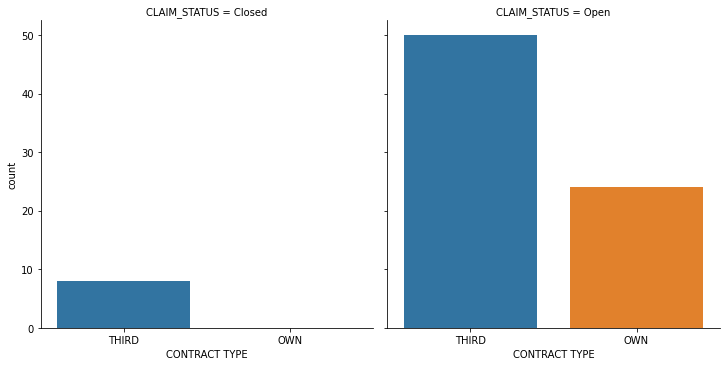

In [52]:
#Number of labor claims by contract type and claim status
sns.catplot(x='CONTRACT TYPE', data= LaborClaims, kind= 'count', col='CLAIM_STATUS')
plt.show()

In [53]:
#Reclamos de terceros
SupplierClaims= LaborClaims[LaborClaims['CONTRACT TYPE'] == 'THIRD']
SupplierClaims.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION,CLAIM_STATUS
5,0000000-00.2014.0.00.0077,LABOR,2014-02-02,2015-03-09,150000.0,112500.0,FORTALEZA,THIRD,OREGON,TELEMARKETING ATTENDANT,Closed
6,0000000-00.2014.0.00.0076,LABOR,2014-07-22,2015-04-08,50000.0,7500.0,NATAL,THIRD,OREGON,TELEMARKETING ATTENDANT,Closed
7,0000000-00.2014.0.00.0043,LABOR,2014-07-22,NaT,40870.0,NaN,FORTALEZA,THIRD,EAGLE SURVEILLANCE,VIGILANT II,Open
8,0000000-00.2014.0.00.0071,LABOR,2014-08-20,NaT,70000.0,NaN,FORTALEZA,THIRD,BLUE'S CLEANING,CLEANING LEADER,Open
13,0000000-00.2016.0.00.0045,LABOR,2016-03-30,NaT,123102.0,NaN,SÃO LUÍS,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT,Open


### Supplier's claims

In [54]:
SupplierClaims['SUPPLIER NAME'].value_counts()

BLUE'S CLEANING       28
EAGLE SURVEILLANCE    21
OREGON                 9
Name: SUPPLIER NAME, dtype: int64

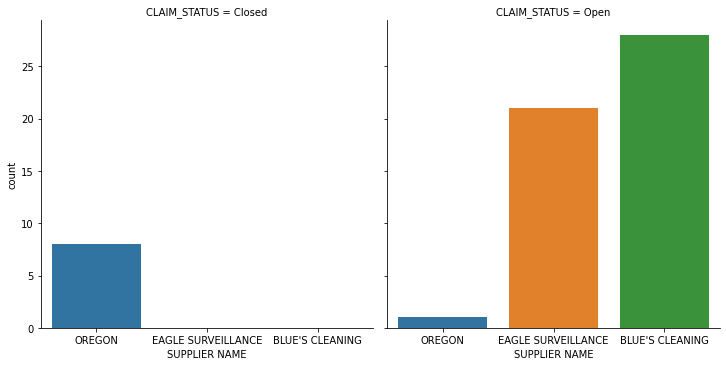

In [55]:
#Number of claims by supplier and claim status
sns.catplot(x='SUPPLIER NAME', data= SupplierClaims, kind= 'count', col='CLAIM_STATUS')
plt.show()

In [56]:
SupplierClaims['TYPE OF POSITION'].value_counts()

CLEANING ASSISTANT         24
VIGILANT                   12
VIGILANT II                 9
TELEMARKETING ATTENDANT     9
CLEANING LEADER             3
CLEANING MANAGER            1
Name: TYPE OF POSITION, dtype: int64

In [57]:
#Number of claims by supplier and type of position
pd.pivot_table(index='TYPE OF POSITION', columns='SUPPLIER NAME', aggfunc= 'count', data= SupplierClaims, values= 'LAWSUIT NUMBER', margins= True)

SUPPLIER NAME,BLUE'S CLEANING,EAGLE SURVEILLANCE,OREGON,All
TYPE OF POSITION,,,,
CLEANING ASSISTANT,24.0,NaN,NaN,24
CLEANING LEADER,3.0,NaN,NaN,3
CLEANING MANAGER,1.0,NaN,NaN,1
TELEMARKETING ATTENDANT,NaN,NaN,9.0,9
VIGILANT,NaN,12.0,NaN,12
VIGILANT II,NaN,9.0,NaN,9
All,28.0,21.0,9.0,58


### Análisis de reclamos de empleados propios

In [58]:

OwnClaims= LaborClaims[LaborClaims['CONTRACT TYPE'] == 'OWN']
OwnClaims.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION,CLAIM_STATUS
9,0000000-00.2015.0.00.0000,LABOR,2015-05-14,NaT,55000.0,NaN,RECIFE,OWN,-,KITCHEN ASSISTANT,Open
11,0000000-00.2015.0.00.0018,LABOR,2015-08-02,NaT,27741.0,NaN,NATAL,OWN,-,KITCHEN ASSISTANT,Open
12,0000000-00.2015.0.00.0002,LABOR,2015-09-07,NaT,37801.0,NaN,RECIFE,OWN,-,KITCHEN ASSISTANT,Open
19,0000000-00.2016.0.00.0019,LABOR,2016-07-31,NaT,40000.0,NaN,SÃO LUÍS,OWN,-,CASHIER,Open
29,0000000-00.2017.0.00.0011,LABOR,2017-10-24,NaT,704839.0,NaN,RECIFE,OWN,-,CASHIER,Open


In [59]:
OwnClaims['TYPE OF POSITION'].value_counts()

KITCHEN ASSISTANT    13
CASHIER               6
CHEF                  3
MANAGER               2
Name: TYPE OF POSITION, dtype: int64

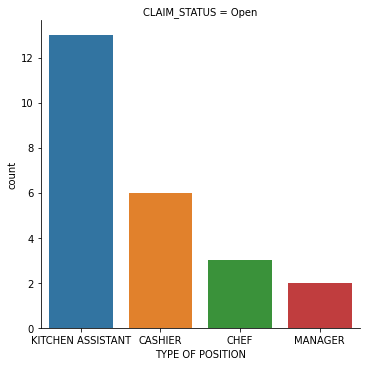

In [60]:
#Own employee's claims per type of position
sns.catplot(x='TYPE OF POSITION', data= OwnClaims, kind= 'count', col='CLAIM_STATUS')
plt.show()

## Existe relación entre el monto reclamado y el monto pagado?

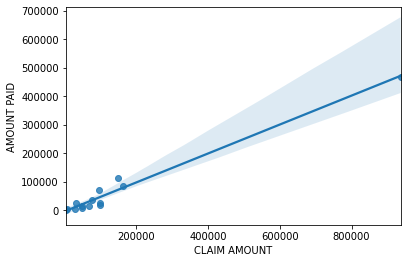

In [62]:
#Regression model for claim amount and amount paid
sns.regplot(x='CLAIM AMOUNT', y='AMOUNT PAID', data=df)
plt.show()


In [67]:
without_outlier= df[df['AMOUNT PAID'] < 300000]
without_outlier['AMOUNT PAID'].max()

112500.0

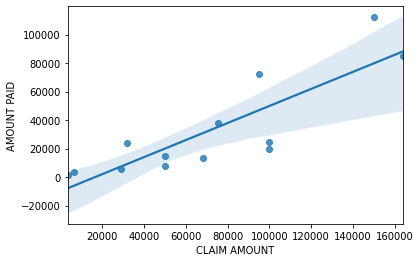

In [68]:
#Regression line for claim amount and amount paid, without the extreme value
sns.regplot(x='CLAIM AMOUNT', y='AMOUNT PAID', data=without_outlier)
plt.show()

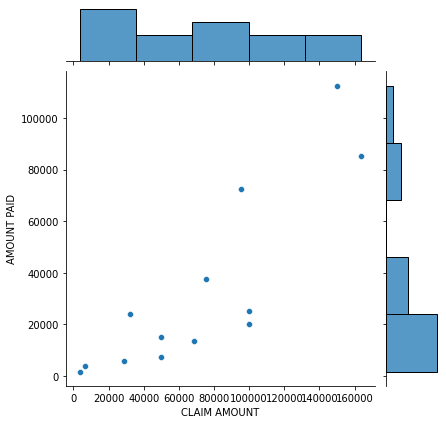

In [69]:
#Jointplot for claim amount and amount paid, without the extreme value
sns.jointplot(x='CLAIM AMOUNT', y='AMOUNT PAID', data=without_outlier)
plt.show()

### ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric, have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study